# Regression with CART Trees - Lab

## Introduction

In this lab, we'll make use of what we learned in the previous lesson to build a model for the [Petrol Consumption Dataset](https://www.kaggle.com/harinir/petrol-consumption) from Kaggle. This model will be used to predict gasoline consumption for a bunch of examples, based on features about the drivers.

## Objectives

In this lab you will: 

- Fit a decision tree regression model with scikit-learn

## Import necessary libraries 

In [1]:
# Import libraries 
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split 

## The dataset 

- Import the `'petrol_consumption.csv'` dataset 
- Print the first five rows of the data 
- Print the dimensions of the data 

In [2]:
# Import the dataset
dataset = pd.read_csv("petrol_consumption.csv")

In [3]:
# Print the first five rows
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
# Print the dimensions of the data
dataset.shape

(48, 5)

- Print the summary statistics of all columns in the data: 

In [6]:
# Describe the dataset
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Create training and test sets

- Assign the target column `'Petrol_Consumption'` to `y` 
- Assign the remaining independent variables to `X` 
- Split the data into training and test sets using a 80/20 split 
- Set the random state to 42 

In [8]:
# Split the data into training and test sets
X = dataset.drop("Petrol_Consumption", axis = 1)
y = dataset["Petrol_Consumption"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42,
                                                   test_size = 0.2)

## Create an instance of CART regressor and fit the data to the model 

As mentioned earlier, for a regression task we'll use a different `sklearn` class than we did for the classification task. The class we'll be using here is the `DecisionTreeRegressor` class, as opposed to the `DecisionTreeClassifier` from before.

In [9]:
# Import the DecisionTreeRegressor class 
from sklearn.tree import DecisionTreeRegressor

# Instantiate and fit a regression tree model to training data 
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## Make predictions and calculate the MAE, MSE, and RMSE

Use the above model to generate predictions on the test set. 

Just as with decision trees for classification, there are several commonly used metrics for evaluating the performance of our model. The most common metrics are:

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

If these look familiar, it's likely because you have already seen them before -- they are common evaluation metrics for any sort of regression model, and as we can see, regressions performed with decision tree models are no exception!

Since these are common evaluation metrics, `sklearn` has functions for each of them that we can use to make our job easier. You'll find these functions inside the `metrics` module. In the cell below, calculate each of the three evaluation metrics. 

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate these predictions
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred,
                                                     squared=False))

Mean Absolute Error: 94.3
Mean Squared Error: 17347.7
Root Mean Squared Error: 131.7106677532234


In [14]:
regressor.decision_path(X, check_input=True)

<48x75 sparse matrix of type '<class 'numpy.int64'>'
	with 374 stored elements in Compressed Sparse Row format>

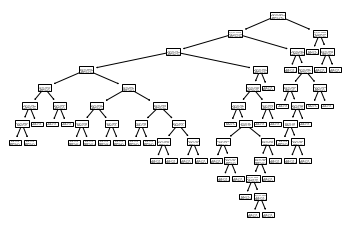

In [19]:
from sklearn.tree import plot_tree

plot_tree(regressor);


## Level Up (Optional)

- Look at the hyperparameters used in the regression tree, check their value ranges in official doc and try running some optimization by growing a number of trees in a loop 

- Use a dataset that you are familiar with and run tree regression to see if you can interpret the results 

- Check for outliers, try normalization and see the impact on the output 

## Summary 

In this lesson, you implemented the architecture to train a tree regressor and predict values for unseen data. You saw that with a vanilla approach, the results were not so great, and thus we must further tune the model (what we described as hyperparameter optimization and pruning, in the case of trees). 